# Layers

Layers in a GDSII or OASIS files are a pair of non-negative integers the specify the purpose of a geometrical shape (or textual object).
In short, they are used to specify whether a shape is a waveguide, a metal interconnect, a cut-out region, etc. according to the fabrication processes.
Layers are composed to create process masks during fabrication and extrusion masks in PhotonForge, so that we can build 3D devices from the 2D layout and use them in [FDTD simulations](Tidy3D_Model.ipynb), for example.

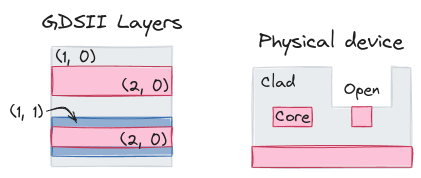

Layers definitions are provided by each foundry.
In PhotonForge, they are available as part of the [technology](Technology.ipynb).

As an example, let's look at the [layers](../_autosummary/photonforge.LayerSpec.rst) specified by the [SiEPIC OpenEBL](https://siepic.ca/openebl/) PDK, available through the `siepic_forge` module:

In [1]:
import photonforge as pf
import siepic_forge as siepic

tech = siepic.ebeam()
pf.config.default_technology = tech

tech.layers

Name          Layer    Description    Color    Pattern
--------------------------------------------------------------
BlackBox             (998, 0)  SiEPIC       #00408018   solid 
Chip design area     (290, 0)  Misc         #80005718   hollow
Deep Trench          (201, 0)  Misc         #c0c0c018   solid 
DevRec               (68, 0)   SiEPIC       #00408018   hollow
Dicing               (210, 0)  Misc         #a0a0c018   solid 
Errors               (999, 0)  SiEPIC       #00008018     /   
FDTD                 (733, 0)  SiEPIC       #80005718   hollow
FbrTgt               (81, 0)   SiEPIC       #00408018     /   
FloorPlan            (99, 0)   Misc         #8000ff18   hollow
Isolation Trench     (203, 0)  Misc         #c0c0c018   solid 
Keep out             (202, 0)  Misc         #a0a0c018     //  
M1_heater            (11, 0)   Metal        #ebc63418     xx  
M2_router            (12, 0)   Metal        #90857018     xx  
M_Open               (13, 0)   Metal        #3471eb18     xx  
Oxide open (to BOX)   (6, 0)   Waveguides   #ffae0018     \   
PinRec               (1, 10)   SiEPIC       #00408018     /   
PinRecM              (1, 11)   SiEPIC       #00408018     /   
SEM                  (200, 0)  Misc         #ff00ff18     \   
Si                    (1, 0)   Waveguides   #ff80a818     \\  
Si N                 (20, 0)   Doping       #7000ff18     \\  
Si N++               (24, 0)   Doping       #0000ff18     :   
Si slab               (2, 0)   Waveguides   #80a8ff18     /   
SiN                   (4, 0)   Waveguides   #a6cee318     \\  
Si_Litho193nm        (1, 69)   Waveguides   #cc80a818     \   
Text                 (10, 0)                #0000ff18     \   
VC                   (40, 0)   Metal        #3a027f18     xx  
Waveguide            (1, 99)   Waveguides   #ff80a818     \

We see the many layers available for use with this PDK.
Each layer will have a particular use, such as the "Si" layer, number `(1, 0)`, which is used to specify core device regions.

Other specifications found in each layer are used for information and visualization only.
They have no impact in the [exported layout](Layout_Export.ipynb).

## Using Layers

Whenever a layer is required, we can chose to use the layer number directly or the layer name.
As long as the layer name exists within the technology being used, the layer number will be correctly found.

In [2]:
component = pf.Component("MAIN")

circle = pf.Circle(1, (0, 0))
rectangle = pf.Rectangle((2, -1), (3, 1))

# Use the layer number directly
component.add((1, 0), circle)

# Use the layer name (the number will be retrieved from the component's technology)
component.add("Si", rectangle)

print(component.structures)

{(1, 0): [Circle(radius=(1, 1), inner_radius=(0, 0), center=(0, 0), sector=(0, 0), rotation=0), Rectangle(center=(2.5, 0), size=(1, 2), rotation=0)]}


## Customizing Layers

It is possible to fully modify layer specifications, but changing the name or the number of a layer specified in a PDK might lead to invalid layouts, so do it only when absolutely sure that it is necessary.

Layer descriptions and drawing specifications don't have the same impact and can be freely customized.

In [3]:
component = pf.Component("TEST")
component.add("M1_heater", pf.Rectangle((0, -0.5), (2.5, 0.5)))

In [4]:
tech.layers["M1_heater"].color = "#C0C0CE60"
component

[Adding](../_autosummary/photonforge.Technology.rst#photonforge.Technology.add_layer) or [removing](../_autosummary/photonforge.Technology.rst#photonforge.Technology.remove_layer) a layer specification is also easy, when necessary:

In [5]:
new_layer = pf.LayerSpec((4, 0), "Waveguide clad etch", color=(204, 255, 204, 1), pattern=".")
tech.add_layer("WG_CLAD_ETCH", new_layer)

tech.layers

Name          Layer        Description        Color    Pattern
----------------------------------------------------------------------
BlackBox             (998, 0)  SiEPIC               #00408018   solid 
Chip design area     (290, 0)  Misc                 #80005718   hollow
Deep Trench          (201, 0)  Misc                 #c0c0c018   solid 
DevRec               (68, 0)   SiEPIC               #00408018   hollow
Dicing               (210, 0)  Misc                 #a0a0c018   solid 
Errors               (999, 0)  SiEPIC               #00008018     /   
FDTD                 (733, 0)  SiEPIC               #80005718   hollow
FbrTgt               (81, 0)   SiEPIC               #00408018     /   
FloorPlan            (99, 0)   Misc                 #8000ff18   hollow
Isolation Trench     (203, 0)  Misc                 #c0c0c018   solid 
Keep out             (202, 0)  Misc                 #a0a0c018     //  
M1_heater            (11, 0)   Metal                #c0c0ce60     xx  
M2_router            (12, 0)   Metal                #90857018     xx  
M_Open               (13, 0)   Metal                #3471eb18     xx  
Oxide open (to BOX)   (6, 0)   Waveguides           #ffae0018     \   
PinRec               (1, 10)   SiEPIC               #00408018     /   
PinRecM              (1, 11)   SiEPIC               #00408018     /   
SEM                  (200, 0)  Misc                 #ff00ff18     \   
Si                    (1, 0)   Waveguides           #ff80a818     \\  
Si N                 (20, 0)   Doping               #7000ff18     \\  
Si N++               (24, 0)   Doping               #0000ff18     :   
Si slab               (2, 0)   Waveguides           #80a8ff18     /   
SiN                   (4, 0)   Waveguides           #a6cee318     \\  
Si_Litho193nm        (1, 69)   Waveguides           #cc80a818     \   
Text                 (10, 0)                        #0000ff18     \   
VC                   (40, 0)   Metal                #3a027f18     xx  
WG_CLAD_ETCH          (4, 0)   Waveguide clad etch  #ccffcc01     .   
Waveguide            (1, 99)   Waveguides           #ff80a818     \

In [6]:
component.add("WG_CLAD_ETCH", pf.Rectangle((0, 0), (1, 1)))
component.structures

{(4, 0): [Rectangle(center=(0.5, 0.5), size=(1, 1), rotation=0)],
 (11, 0): [Rectangle(center=(1.25, 0), size=(2.5, 1), rotation=0)]}

In [7]:
tech.remove_layer("WG_CLAD_ETCH")
tech.layers

Name          Layer    Description    Color    Pattern
--------------------------------------------------------------
BlackBox             (998, 0)  SiEPIC       #00408018   solid 
Chip design area     (290, 0)  Misc         #80005718   hollow
Deep Trench          (201, 0)  Misc         #c0c0c018   solid 
DevRec               (68, 0)   SiEPIC       #00408018   hollow
Dicing               (210, 0)  Misc         #a0a0c018   solid 
Errors               (999, 0)  SiEPIC       #00008018     /   
FDTD                 (733, 0)  SiEPIC       #80005718   hollow
FbrTgt               (81, 0)   SiEPIC       #00408018     /   
FloorPlan            (99, 0)   Misc         #8000ff18   hollow
Isolation Trench     (203, 0)  Misc         #c0c0c018   solid 
Keep out             (202, 0)  Misc         #a0a0c018     //  
M1_heater            (11, 0)   Metal        #c0c0ce60     xx  
M2_router            (12, 0)   Metal        #90857018     xx  
M_Open               (13, 0)   Metal        #3471eb18     xx  
Oxide open (to BOX)   (6, 0)   Waveguides   #ffae0018     \   
PinRec               (1, 10)   SiEPIC       #00408018     /   
PinRecM              (1, 11)   SiEPIC       #00408018     /   
SEM                  (200, 0)  Misc         #ff00ff18     \   
Si                    (1, 0)   Waveguides   #ff80a818     \\  
Si N                 (20, 0)   Doping       #7000ff18     \\  
Si N++               (24, 0)   Doping       #0000ff18     :   
Si slab               (2, 0)   Waveguides   #80a8ff18     /   
SiN                   (4, 0)   Waveguides   #a6cee318     \\  
Si_Litho193nm        (1, 69)   Waveguides   #cc80a818     \   
Text                 (10, 0)                #0000ff18     \   
VC                   (40, 0)   Metal        #3a027f18     xx  
Waveguide            (1, 99)   Waveguides   #ff80a818     \